## Training with ImageDataGenerator

In [1]:
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

--2024-04-18 03:13:27--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.128.207, 74.125.143.207, 173.194.69.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.128.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip’

horse-or-human.zip  100%[===================>] 142.65M  41.2MB/s    in 4.0s    

2024-04-18 03:13:31 (35.3 MB/s) - ‘horse-or-human.zip’ saved [149574867/149574867]



In [2]:
import zipfile

# Unzip the dataset
local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./horse-or-human')
zip_ref.close()

In [3]:
import os

# Directory with our training horse pictures
train_horse_dir = os.path.join('./horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('./horse-or-human/humans')

In [4]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse49-8.png', 'horse30-3.png', 'horse26-4.png', 'horse49-4.png', 'horse09-2.png', 'horse44-9.png', 'horse02-9.png', 'horse36-5.png', 'horse05-1.png', 'horse16-4.png']
['human01-06.png', 'human03-23.png', 'human12-03.png', 'human11-24.png', 'human07-24.png', 'human16-03.png', 'human17-21.png', 'human08-17.png', 'human13-29.png', 'human12-11.png']


In [5]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))

total training horse images: 500
total training human images: 527


In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

Display a batch of 8 horse an 8 human picture

In [7]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname)
                  for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname)
                  for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [8]:
import tensorflow as tf

Add convolutional layer

In [9]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 149, 149, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 73, 73, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 35, 35, 64)        0

In [11]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

### Data Prepocessing

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow train images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    './horse-or-human/', # source dir for training images
    target_size=(300, 300), # all image will be resized to 300x300
    batch_size=128,
    # Since we use binary_crossentropy loss, we need binary labels
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.


Training

In [13]:
history = model.fit(
    train_generator,
    steps_per_epoch=8,
    epochs=15,
    verbose=1
)

Epoch 1/15
8/8 [==============================] - 19s 932ms/step - loss: 1.0968 - accuracy: 0.5284
Epoch 2/15
8/8 [==============================] - 8s 955ms/step - loss: 0.7009 - accuracy: 0.6029
Epoch 3/15
8/8 [==============================] - 12s 1s/step - loss: 0.6632 - accuracy: 0.6073
Epoch 4/15
8/8 [==============================] - 11s 1s/step - loss: 0.8393 - accuracy: 0.5328
Epoch 5/15
8/8 [==============================] - 9s 1s/step - loss: 0.8292 - accuracy: 0.7898
Epoch 6/15
8/8 [==============================] - 9s 981ms/step - loss: 0.5220 - accuracy: 0.8042
Epoch 7/15
8/8 [==============================] - 11s 1s/step - loss: 0.3782 - accuracy: 0.8443
Epoch 8/15
8/8 [==============================] - 12s 1s/step - loss: 0.4030 - accuracy: 0.8454
Epoch 9/15
8/8 [==============================] - 8s 974ms/step - loss: 0.1427 - accuracy: 0.9444
Epoch 10/15
8/8 [==============================] - 13s 2s/step - loss: 0.0730 - accuracy: 0.9744
Epoch 11/15
8/8 [==============

Model Prediction

In [23]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path ='/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])

  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")


Saving human_3.jpg to human_3 (1).jpg
Saving human_2.jpg to human_2 (1).jpg
Saving human_1.jpg to human_1 (1).jpg
Saving horse_3.jpg to horse_3 (2).jpg
Saving horse_2.jpg to horse_2 (1).jpg
Saving horse_1.jpg to horse_1 (3).jpg
1/1 [==============================] - 0s 26ms/step
[0.9999987]
human_3 (1).jpg is a human
1/1 [==============================] - 0s 27ms/step
[0.00526111]
human_2 (1).jpg is a horse
1/1 [==============================] - 0s 33ms/step
[0.99985397]
human_1 (1).jpg is a human
1/1 [==============================] - 0s 35ms/step
[0.35637492]
horse_3 (2).jpg is a horse
1/1 [==============================] - 0s 33ms/step
[0.00883603]
horse_2 (1).jpg is a horse
1/1 [==============================] - 0s 36ms/step
[0.99838877]
horse_1 (3).jpg is a human


Visualizing Intermediate Representations

1/1 [==============================] - 0s 96ms/step


<ipython-input-26-5f2218a859eb>:44: RuntimeWarning: invalid value encountered in divide
  x /= x.std()
<ipython-input-26-5f2218a859eb>:47: RuntimeWarning: invalid value encountered in cast
  x = np.clip(x, 0, 255).astype('uint8')


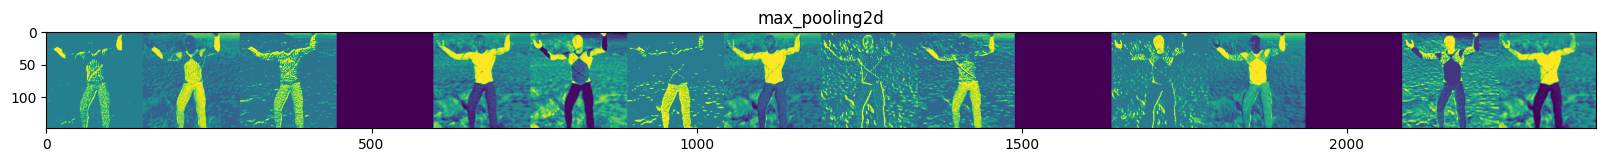

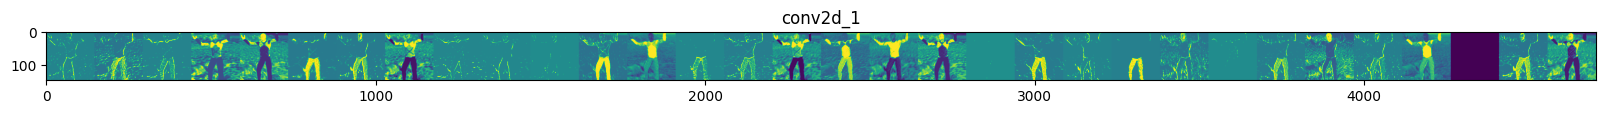

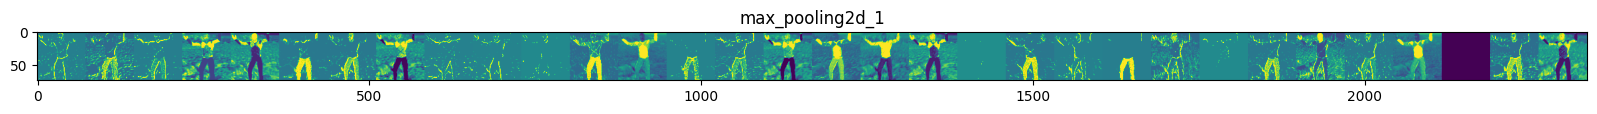

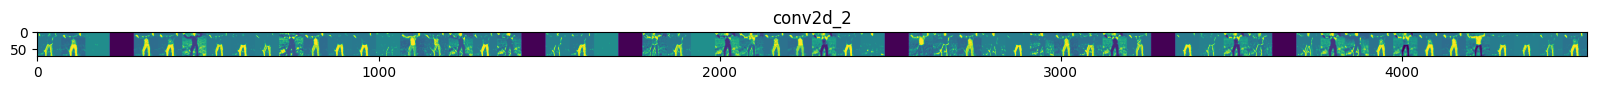

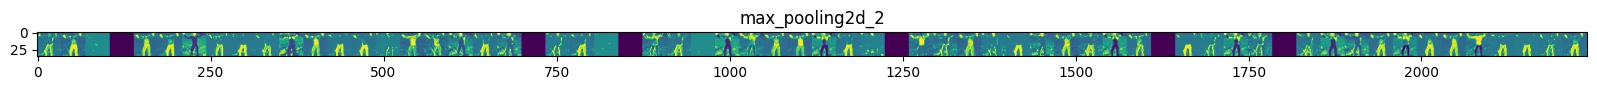

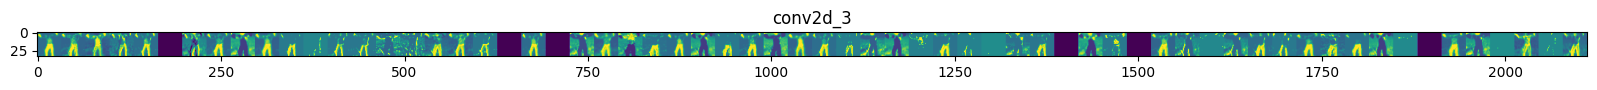

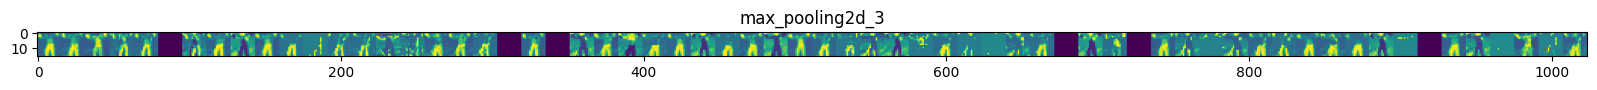

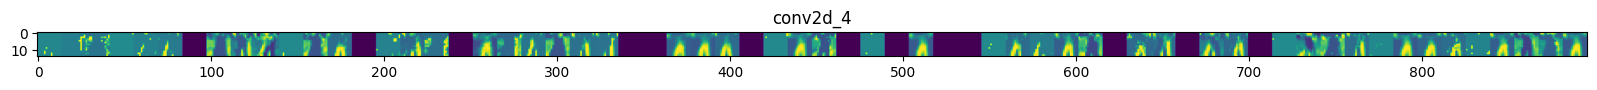

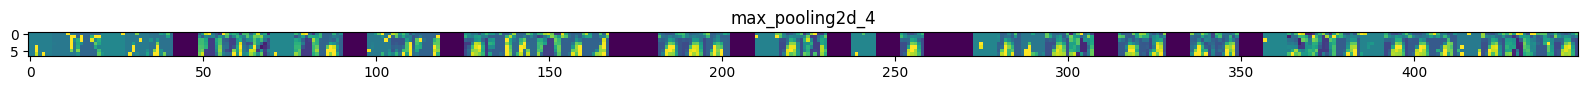

In [26]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Define a new Model that will take an image as input, and will output
# intermediate representation for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Prepare a random input image from the training set
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300)) # This is a PIL image
x = img_to_array(img) # Numpy array with shape (300, 300, 3)
x = x.reshape((1,) + x.shape) # Numpy array with shape (1, 300, 300, 3)

# Scale by 1/255
x /= 255

# Run the image through the network, thus obtaining all
# Intermediate representations for this image
successive_feature_maps = visualization_model.predict(x)

layer_names = [layer.name for layer in model.layers[1:]]

# Display the representation
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:

    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map

    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]

    # Tile the images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')

      # Tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x

    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
